In [193]:
import tensorflow as tf
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import io

## Natural Language Processing TensorFlow
NLP merupakan sebuah metode untuk memberikan sebuah informasi dari Text (tulisan) maupun Suara. Kali ini saya akan mencontohkan penggunaan NLP pada Text dalam penentuan sebuah Tweet seseorang, Tweet tersebut membahas tentang bencana atau tidak.

Dataset : https://www.kaggle.com/competitions/nlp-getting-started/data?select=train.csv

In [194]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-d09d3a20-0d28-7650-289c-3c82763065cb)


In [195]:
 test_sample = pd.read_csv("test.csv")
 train_sample = pd.read_csv("train.csv")

In [196]:
test_sample, train_sample

(         id keyword location  \
 0         0     NaN      NaN   
 1         2     NaN      NaN   
 2         3     NaN      NaN   
 3         9     NaN      NaN   
 4        11     NaN      NaN   
 ...     ...     ...      ...   
 3258  10861     NaN      NaN   
 3259  10865     NaN      NaN   
 3260  10868     NaN      NaN   
 3261  10874     NaN      NaN   
 3262  10875     NaN      NaN   
 
                                                    text  
 0                    Just happened a terrible car crash  
 1     Heard about #earthquake is different cities, s...  
 2     there is a forest fire at spot pond, geese are...  
 3              Apocalypse lighting. #Spokane #wildfires  
 4         Typhoon Soudelor kills 28 in China and Taiwan  
 ...                                                 ...  
 3258  EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...  
 3259  Storm in RI worse than last hurricane. My city...  
 3260  Green Line derailment in Chicago http://t.co/U...  
 3261  MEG i

In [197]:
train_sample.head(20)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [198]:
train_sample.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

### KETERANGAN : 
`1` : Bencana 

`0` : Bukan Bencana

In [199]:
len(train_sample), len(test_sample)

(7613, 3263)

In [200]:
train_sample_shuffle = train_sample.sample(frac=1, random_state=32)

In [201]:
train_sample_shuffle

,id,keyword,location,text,target
2250,3221,deluged,London,Why are you deluged with low self-image? Take ...,1
7155,10252,war%20zone,NaN,Bedroom clean bathroom clean laundry done .....,0
3148,4522,emergency,"Indianapolis, IN",UPDATE: Indiana State Police reopening I-65 ne...,1
1857,2670,crush,GLOBAL,Had a minute alone with my crush??...it was an...,0
4760,6773,lightning,"Victoria, BC",Lightning causes six new fires on VancouveråÊI...,1
...,...,...,...,...,...
4030,5722,forest%20fire,"Redding, California, USA",View of smoke column rising above the south en...,1
2940,4225,drowned,NaN,Toddler drowned in bath after mum left room to...,1
1334,1927,burning%20buildings,we?it Û¢ ixwin,@Louis_Tomlinson incredible? THE CHILDREN WERE...,1
1579,2280,cliff%20fall,NaN,Currently want to drive my car off a cliff and...,0


In [202]:
#cek beberapa elemen text random

random_index = random.randint(0, len(train_sample)-10)
for row in train_sample_shuffle[['text', 'target']][random_index:random_index+10].itertuples():
  _, text, target = row
  print(f'Target : {target}', '(Bencana)' if target > 0 else '(Bukan Bencana)')
  print(f'Text: {text}\n\n')

Target : 1 (Bencana)
Text: Families to sue over Legionnaires: More than 40 families affected by the fatal outbreak of Legionnaires' disea... http://t.co/hKxYzhvmQE


Target : 0 (Bukan Bencana)
Text: @MythGriy they can't detonate unless they touch the ground


Target : 0 (Bukan Bencana)
Text: I liked a @YouTube video from @itsjustinstuart http://t.co/Mnkaji2Q1N GUN RANGE MAYHEM!


Target : 1 (Bencana)
Text: I can't drown my demons they know how to swim


Target : 0 (Bukan Bencana)
Text: Hail! [pic] ÛÓ https://t.co/B7omJ7U3EI


Target : 0 (Bukan Bencana)
Text: Day 2. Liquidation of emergency at chemical object. #USAR2015 #USAR15 #RUOR #??????????? http://t.co/gGTmDqUdDo


Target : 1 (Bencana)
Text: Storm concludes City of Calgary's Municipal Emergency Plan deactivated http://t.co/93iaEec26T


Target : 0 (Bukan Bencana)
Text: Gostei de um vÌ_deo @YouTube de @christinartnd http://t.co/bwe9kJCEPt Sleeping with Sirens Postcards and Polaroids acoustic cover


Target : 1 (Bencana)
Text: @OhYa

In [203]:
#split train data

train_data, validation_data, train_labels, validation_labels = train_test_split(train_sample_shuffle['text'].to_numpy(), 
                                                                                train_sample_shuffle['target'].to_numpy(),
                                                                                test_size=0.1,
                                                                                random_state=32)

In [204]:
 #panjang data

 len(train_data), len(validation_data), len(train_labels), len(validation_labels)

(6851, 762, 6851, 762)

In [205]:
max_vocab_length = 10000 # max number of words to have in our vocabulary
max_length = 15 # max length our sequences will be (e.g. how many words from a Tweet does our model see?)

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int",
                                    output_sequence_length=max_length)

In [206]:
text_vectorizer.adapt(train_data)

In [207]:
sample_sentence = "There's a flood in my street!"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[305,   3, 217,   4,  13, 732,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [208]:
embedding = layers.Embedding(10000, 128, input_length=500)

In [209]:
#setting callback
class callback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs.get('accuracy') > 0.93 and logs.get('val_accuracy') > 0.74:
      print("\nTraining was stopped. Got:")
      self.model.stop_training = True

callbacks = callback()

In [210]:
#buat model
inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.LSTM(64, return_sequences=True)(x)
x = layers.LSTM(64)(x)
x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(inputs, outputs, name='Model')

In [211]:
model.summary()

Model: "Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_6 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_8 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 lstm_12 (LSTM)              (None, 15, 64)            49408     
                                                                 
 lstm_13 (LSTM)              (None, 64)                33024     
                                                                 
 dense_12 (Dense)            (None, 64)                4160      
                                                             

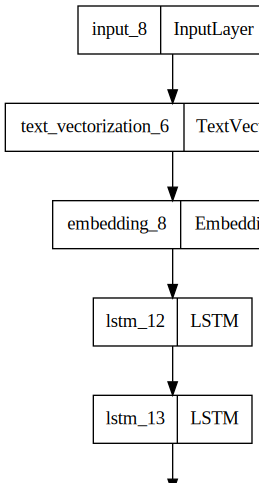

In [212]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model,  show_shapes=False, show_layer_names=True, rankdir='HB').create(prog='dot', format='svg'))

In [213]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [214]:
history = model.fit(train_data,
                    train_labels,
                    epochs=100,
                    validation_data=(validation_data, validation_labels),
                    callbacks=[callbacks])

Epoch 1/100
215/215 [==============================] - 5s 12ms/step - loss: 0.5110 - accuracy: 0.7470 - val_loss: 0.4611 - val_accuracy: 0.7861
Epoch 2/100
215/215 [==============================] - 2s 8ms/step - loss: 0.3188 - accuracy: 0.8701 - val_loss: 0.5139 - val_accuracy: 0.7743
Epoch 3/100
215/215 [==============================] - 2s 8ms/step - loss: 0.2150 - accuracy: 0.9152 - val_loss: 0.5922 - val_accuracy: 0.7664
Epoch 4/100
213/215 [============================>.] - ETA: 0s - loss: 0.1447 - accuracy: 0.9413
Training was stopped. Got:
215/215 [==============================] - 2s 8ms/step - loss: 0.1453 - accuracy: 0.9412 - val_loss: 0.7384 - val_accuracy: 0.7612


In [215]:
model.predict(validation_data)[:10]

array([[9.9987829e-01],
       [5.5591520e-02],
       [5.7184603e-03],
       [1.9107580e-02],
       [9.9979061e-01],
       [9.4275719e-01],
       [4.7027715e-03],
       [3.6804506e-04],
       [1.1555321e-01],
       [9.9988687e-01]], dtype=float32)

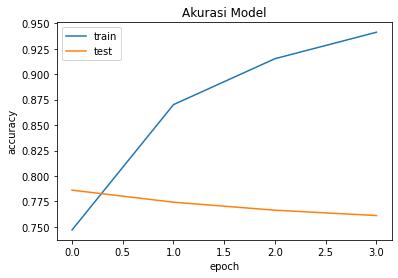

In [216]:
#membuat plot akurasi model

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

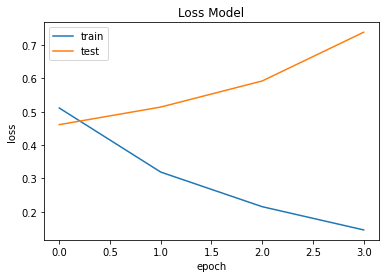

In [217]:
#membuat plot loss model

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [218]:
weights = model.get_layer("embedding_8").get_weights()[0]
weights.shape

(10000, 128)

In [219]:
vocab = text_vectorizer.get_vocabulary()

In [220]:
out_v = io.open('vectors.tsv', 'w', encoding='utf-8')
out_m = io.open('metadata.tsv', 'w', encoding='utf-8')

for index, word in enumerate(vocab):
  if index == 0:
    continue  # skip 0, it's padding.
  vec = weights[index]
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
  out_m.write(word + "\n")
out_v.close()
out_m.close()

In [221]:
test_sentence = test_sample['text'].to_list()
test_prep = random.sample(test_sentence, 20)
for test_final in test_prep:
  prob = tf.squeeze(model.predict([test_final]))
  predict = tf.round(prob)
  print(f'Prediksi: {int(predict)}\nKemungkinan: {prob}') 
  print(f'Text: {test_final}\n\n')

Prediksi: 1
Kemungkinan: 0.8713528513908386
Text: Do people even ride Metro any more? http://t.co/Nb8yzecI6i #whywebike #bikecommute #DysfunctionalRedLine #WMATA


Prediksi: 1
Kemungkinan: 0.9973275661468506
Text: The Cafe Run by Acid Attack Survivors in #India http://t.co/XtVRJMRREs http://t.co/ndvlAPJvQL


Prediksi: 1
Kemungkinan: 0.8518832921981812
Text: I just watched Halt and Catch Fire 2x10 'Heaven is a Place' https://t.co/jcPxOrV3AU #trakt


Prediksi: 0
Kemungkinan: 0.0017468510195612907
Text: 4 Common Running Injuries and How to Avoid Them http://t.co/26HWLpWmXr


Prediksi: 1
Kemungkinan: 0.9991841912269592
Text: Crews responding to small brush fire burning in Tahoe Forest - My News 4 - KRNV Reno NV http://t.co/VhyJnVug6f


Prediksi: 0
Kemungkinan: 0.02131081372499466
Text: SEISMIC AUDIO SA-15T SA15T Padded Black Speaker COVERS (2) - Qty of 1 = 1 Pair! http://t.co/6OVxU5cy35 http://t.co/fAobg3I1zm


Prediksi: 1
Kemungkinan: 0.9998561143875122
Text: Suspected Salvadoran gang mem

In [222]:
model.predict(test_sentence)

array([[0.5964491 ],
       [0.3791678 ],
       [0.9955499 ],
       ...,
       [0.99950016],
       [0.89358556],
       [0.9236895 ]], dtype=float32)

In [223]:
rounded_predict = tf.round(tf.squeeze(model.predict(test_sentence)))
rounded_predict

<tf.Tensor: shape=(3263,), dtype=float32, numpy=array([1., 0., 1., ..., 1., 1., 1.], dtype=float32)>

In [224]:
test_sample['target'] = rounded_predict
test_sample

,id,keyword,location,text,target
0,0,NaN,NaN,Just happened a terrible car crash,1.0
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...",0.0
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are...",1.0
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,0.0
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,1.0
...,...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,1.0
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...,0.0
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...,1.0
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...,1.0


In [225]:
test_sample.to_csv('final_result.csv')